# A. EFA vs. CFA Revisited

## Packages

In [20]:
library(tidyverse)
library(psych)
library(sem)
options(fit.indices = c("CFI", "GFI", "RMSEA", "BIC"))

## Dataset

In [16]:
data(bfi)
bfi <- bfi[, 1:25]

# Establish two sets of indices to split the dataset
N <- nrow(bfi)
indices <- seq(1, N)
indices_EFA <- sample(indices, floor((.5*N)))
indices_CFA <- indices[!(indices %in% indices_EFA)]

# Use those indices to split the dataset into halves for your EFA and CFA
bfi_EFA <- bfi[indices_EFA, ]
bfi_CFA <- bfi[indices_CFA, ]

## Theoretical Model

In [33]:
theory_syn_eq <- "
AGE: A1, A2, A3, A4, A5     #Agreeableness
CON: C1, C2, C3, C4, C5     #Conscientiousness
EXT: E1, E2, E3, E4, E5     #Extraversion
NEU: N1, N2, N3, N4, N5     #Neuroticism
OPE: O1, O2, O3, O4, O5     #Openness
"
theory_syn <- cfa(text = theory_syn_eq,
                  reference.indicators = FALSE)

theory_CFA <- sem(theory_syn, data = bfi_CFA)

summary(theory_CFA)

NOTE: adding 25 variances to the model
Warning message in sem.semmod(theory_syn, data = bfi_CFA):
“-172 observations removed due to missingness”


 Model Chisquare =  2370.691   Df =  265 Pr(>Chisq) = 0
 Goodness-of-fit index =  0.8475993
 RMSEA index =  0.08047335   90% CI: (NA, NA)
 Bentler CFI =  0.7610242
 BIC =  485.708

 Normalized Residuals
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-8.3102 -0.5405  0.9170  1.0907  2.5613  9.3314 

 R-square for Endogenous Variables
    A1     A2     A3     A4     A5     C1     C2     C3     C4     C5     E1 
0.1338 0.4095 0.5331 0.2564 0.4033 0.2864 0.3322 0.2870 0.4901 0.3834 0.3051 
    E2     E3     E4     E5     N1     N2     N3     N4     N5     O1     O2 
0.4636 0.3699 0.5320 0.2599 0.6985 0.6547 0.4958 0.3137 0.2256 0.3539 0.1583 
    O3     O4     O5 
0.4991 0.0672 0.2395 

 Parameter Estimates
            Estimate    Std Error  z value    Pr(>|z|)                  
lam[A1:AGE] -0.51096746 0.04352787 -11.738859  8.056639e-32 A1 <--- AGE 
lam[A2:AGE]  0.73634693 0.03338122  22.058720 7.878046e-108 A2 <--- AGE 
lam[A3:AGE]  0.94524009 0.03660325  25.823942 4.775229e-147 A3 <-

## Empirical Model

In [34]:
empiric_model <- fa(bfi_EFA, nfactors = 6)
empiric_syn <- structure.sem(EFA_model)
empiric_CFA <- sem(EFA_syn, data = bfi_CFA)

summary(empiric_CFA)$BIC

Warning message in sem.semmod(EFA_syn, data = bfi_CFA):
“-172 observations removed due to missingness”

[1] 346.8394

## Review of the differences between EFA & CFA

**EFA:**
- Estimates all possible variable/factor relationships
- Looking for patterns in the data
- Use when you don't have a well-developed theory

**CFA:**
- Only examine specified variable/factor relationships
- Testing a theory that you know in advance
- This is the right result to publish!

In [10]:
# View the first five rows of the EFA loadings
EFA_model$loadings[1:5,]

,MR2,MR1,MR3,MR5,MR4,MR6
A1,0.096224280,-0.10050940,0.07446830,-0.5802192,0.02185381,0.29821200
A2,0.005081920,-0.06845946,0.11237419,0.6355191,0.01334716,-0.02500886
A3,0.004798759,-0.21941930,0.04662552,0.5681433,0.04263998,0.11327793
A4,-0.045340852,-0.09673378,0.25368618,0.3175578,-0.10334439,0.12344099
A5,-0.128000280,-0.25787363,0.03801570,0.4626094,0.09795962,0.19855040


In [11]:
# View the first five loadings from the CFA estimated from the EFA results
summary(EFA_CFA)$coeff[1:5,]


,Estimate,Std Error,z value,Pr(>|z|),
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
F4A1,-0.4935284,0.04508315,-10.94707,6.863157e-28,A1 <--- MR5
F4A2,0.7837103,0.03426015,22.87528,8.190732e-116,A2 <--- MR5
F4A3,1.0056589,0.03728808,26.96999,3.325710e-160,A3 <--- MR5
F4A4,0.8060022,0.04388648,18.36562,2.476275e-75,A4 <--- MR5
F4A5,0.8139444,0.03781871,21.52227,9.632907e-103,A5 <--- MR5


## Differences in Factor Scores

In [23]:
# Extracting factor scores from the EFA model
EFA_scores <- EFA_model$scores

In [24]:
# Calculate factor scores for the EFA dataset
CFA_scores <- fscores(EFA_CFA, data = bfi_EFA)

In [25]:
EFA_scores

,MR2,MR1,MR3,MR5,MR4,MR6
62115,-0.53959384,0.74137472,-0.463496192,0.19764833,-0.10703176,-0.31079091
65086,1.29621558,-0.08186917,-1.400542059,-0.05539073,0.73423235,0.70234119
65300,-0.97969655,-1.01097524,1.561253315,1.13623214,1.06736381,-0.53133091
64150,-1.15169469,0.26118214,-1.155852339,-0.79274204,-1.06457083,-0.34523286
65841,NA,NA,NA,NA,NA,NA
63281,0.44978431,0.32609102,0.207922327,0.39060161,0.51998931,-0.17461756
66297,-0.27705295,0.55712370,-0.797195176,0.71624737,0.58457055,0.04039910
66331,0.52920247,0.96189953,0.995762476,-1.63761616,-0.12522165,-0.91426896
62133,NA,NA,NA,NA,NA,NA
63382,-1.42831501,-1.23353144,0.772779717,0.07289435,0.58069129,0.18305632


In [26]:
CFA_scores

,MR1,MR2,MR3,MR5,MR4,MR6
62954,1.44122976,-0.26588419,0.3281332,-0.951293505,0.01270591,-1.25319451
65940,-0.78589019,0.07076889,-0.5671431,0.711554723,-0.43043555,-0.93207137
66061,0.11745304,-0.04849390,-0.5137718,0.467389268,-0.50187601,0.34877842
65599,NA,NA,NA,NA,NA,NA
65552,NA,NA,NA,NA,NA,NA
65620,-0.14812506,0.49886649,-0.8867458,0.899069326,0.57179807,-0.38493834
66493,-0.37480716,0.77465250,0.1773700,-0.711192856,-0.49257414,0.34836003
62168,0.38776520,-0.27886647,-0.1851991,-0.639572348,-0.49078451,0.09682965
63536,NA,NA,NA,NA,NA,NA
63567,0.76586934,1.22105497,1.2402441,-1.131212563,0.73912486,-0.62742146


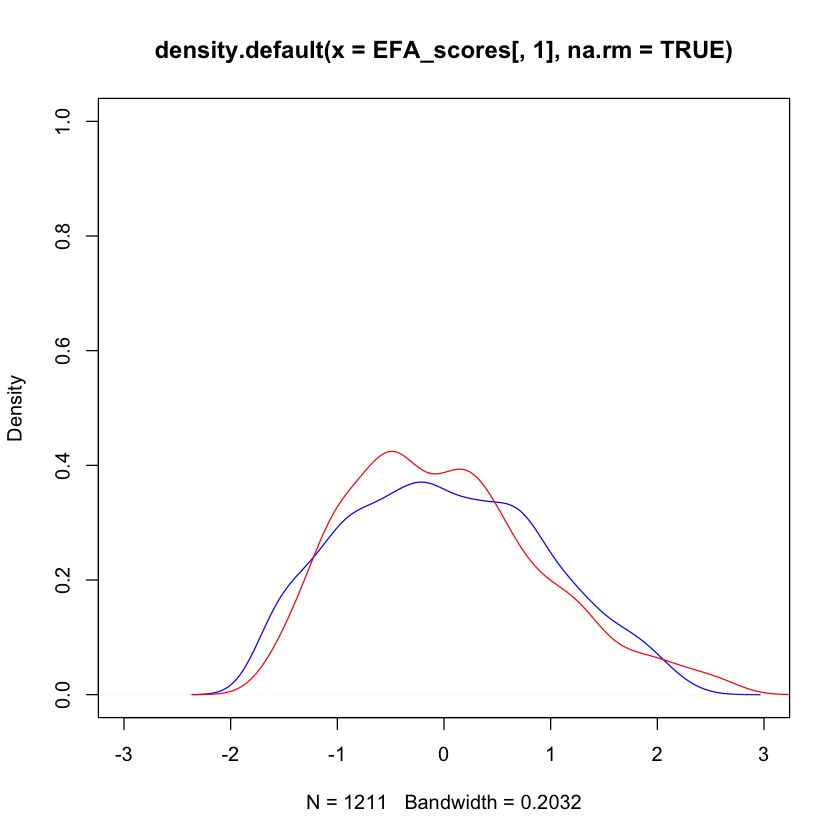

In [28]:
par(bg = 'white')
plot(density(EFA_scores[,1], na.rm = TRUE), 
     xlim = c(-3, 3), ylim = c(0, 1), col = "blue")
lines(density(CFA_scores[,1], na.rm = TRUE), 
     xlim = c(-3, 3), ylim = c(0, 1), col = "red")

# B. Adding Loadings to Improve Fit

## When to make adjustments
Remember:

- EFAs estimate all item/factor loadings
- CFAs only estimate specified loadings
- Poor model fit could be due to excluded loadings

## Adding loadings to the syntax
Two promising item/factor relationships to add:

- Extraversion → Item N4
- Neuroticism → Item E3

## Adding Loadings to the Theoretical Model

In [41]:
# Add some plausible item/factor loadings to the syntax
theory_syn_add <- "
AGE: A1, A2, A3, A4, A5
CON: C1, C2, C3, C4, C5
EXT: E1, E2, E3, E4, E5, N4
NEU: N1, N2, N3, N4, N5, E3
OPE: O1, O2, O3, O4, O5
"
theory_syn_2 <- cfa(text = theory_syn_add,
                  reference.indicators = FALSE)

theory_CFA_add <- sem(theory_syn_2, data = bfi_CFA)
summary(theory_CFA_add)

NOTE: adding 25 variances to the model
Warning message in sem.semmod(theory_syn_2, data = bfi_CFA):
“-172 observations removed due to missingness”


 Model Chisquare =  2230.124   Df =  263 Pr(>Chisq) = 3.910884e-308
 Goodness-of-fit index =  0.8568277
 RMSEA index =  0.07807567   90% CI: (NA, NA)
 Bentler CFI =  0.7767502
 BIC =  359.3679

 Normalized Residuals
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-6.3965 -0.4649  0.8975  1.1194  2.5848  9.1234 

 R-square for Endogenous Variables
    A1     A2     A3     A4     A5     C1     C2     C3     C4     C5     E1 
0.1341 0.4106 0.5341 0.2560 0.4017 0.2850 0.3298 0.2857 0.4914 0.3865 0.3125 
    E2     E3     E4     E5     N4     N1     N2     N3     N5     O1     O2 
0.4755 0.3644 0.5386 0.2608 0.3964 0.7097 0.6574 0.4947 0.2200 0.3537 0.1599 
    O3     O4     O5 
0.4952 0.0681 0.2417 

 Parameter Estimates
            Estimate    Std Error  z value    Pr(>|z|)                  
lam[A1:AGE] -0.51142428 0.04355634 -11.741673  7.792954e-32 A1 <--- AGE 
lam[A2:AGE]  0.73739435 0.03340828  22.072202 5.847303e-108 A2 <--- AGE 
lam[A3:AGE]  0.94609473 0.03665038  25.814049 6.1672

## Comparing the original and revised models

### Likelihood Ratio

In [42]:
# Conduct a likelihood ratio test
anova(theory_CFA, theory_CFA_add)

,Model Df,Model Chisq,Df,LR Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
theory_CFA,265,2370.691,NA,NA,NA
theory_CFA_add,263,2230.124,2,140.5663,2.995086e-31


### CFI

In [36]:
summary(theory_CFA)$CFI

[1] 0.7610242

In [37]:
summary(theory_CFA_add)$CFI

[1] 0.7767502

### RMSEA

In [38]:
summary(theory_CFA)$RMSEA

[1] 0.08047335         NA         NA 0.90000000

In [39]:
summary(theory_CFA_add)$RMSEA

[1] 0.07807567         NA         NA 0.90000000

# C. Improving Fit by Removing Loadings

In [40]:
# Add some plausible item/factor loadings to the syntax
theory_syn_del <- "
AGE: A1, A2, A3, A4, A5
CON: C1, C2, C3, C4, C5
EXT: E1, E2, E3, E4, E5
NEU: N1, N2, N3, N4, N5
OPE: O1, O2, O3, O5
"
theory_syn_3 <- cfa(text = theory_syn_del,
                  reference.indicators = FALSE)

theory_CFA_del <- sem(theory_syn_3, data = bfi_CFA)
summary(theory_CFA_del)

NOTE: adding 24 variances to the model
Warning message in sem.semmod(theory_syn_3, data = bfi_CFA):
“-172 observations removed due to missingness”Warning message in sem.semmod(theory_syn_3, data = bfi_CFA):
“The following observed variables are in the input covariance or raw-moment matrix but do not appear in the model:
O4
”


 Model Chisquare =  2142.708   Df =  242 Pr(>Chisq) = 3.427354e-301
 Goodness-of-fit index =  0.8589165
 RMSEA index =  0.08000696   90% CI: (NA, NA)
 Bentler CFI =  0.7777238
 BIC =  421.3277

 Normalized Residuals
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-8.3390 -0.5616  0.9603  1.0390  2.4536  9.3317 

 R-square for Endogenous Variables
    A1     A2     A3     A4     A5     C1     C2     C3     C4     C5     E1 
0.1337 0.4091 0.5332 0.2574 0.4028 0.2862 0.3321 0.2865 0.4902 0.3839 0.3046 
    E2     E3     E4     E5     N1     N2     N3     N4     N5     O1     O2 
0.4621 0.3734 0.5279 0.2622 0.6993 0.6545 0.4955 0.3131 0.2258 0.3489 0.1622 
    O3     O5 
0.4946 0.2257 

 Parameter Estimates
            Estimate   Std Error  z value    Pr(>|z|)                  
lam[A1:AGE] -0.5108224 0.04353266 -11.734233  8.509385e-32 A1 <--- AGE 
lam[A2:AGE]  0.7360360 0.03338830  22.044728 1.073244e-107 A2 <--- AGE 
lam[A3:AGE]  0.9453071 0.03660894  25.821753 5.053318e-147 A3 <--- AG

## Comparing the original and revised models

In [46]:
anova(theory_CFA_del, theory_CFA)

ERROR: Error in anova.objectiveML(theory_CFA_del, theory_CFA): the models are fit to different moment matrices


### CFI

In [47]:
summary(theory_CFA)$CFI

[1] 0.7610242

In [48]:
summary(theory_CFA_del)$CFI

[1] 0.7777238

### RMSEA

In [49]:
summary(theory_CFA)$RMSEA

[1] 0.08047335         NA         NA 0.90000000

In [50]:
summary(theory_CFA_del)$RMSEA

[1] 0.08000696         NA         NA 0.90000000

# D. Wrap-Up Video

## Things you can do
- Conduct a unidimensional EFA
- Conduct a multidimensional EFA
- Conduct a CFA based on EFA results
- Conduct a CFA based on theory
- Interpret fit statistics
- Compare and refine models